In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [4]:
dfc=pd.read_csv(r'C:\Users\hp\Downloads\Final_Train_doctor.csv')
dfc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
dfc.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
dfc.shape

(5961, 7)

In [7]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
dfc['Fees'].unique()

array([100, 350, 300, 250, 200, 700, 500, 400, 150, 650, 600,  50, 800,
       750, 450,  80,  60, 550, 900, 950, 430, 130, 630, 499, 260,  70,
        10, 299, 230, 380,   5, 280,  40,  30, 180, 920, 125, 850,  20,
       220], dtype=int64)

In [9]:
dfc.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [10]:
dfc.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
dfc['Rating']=imp.fit_transform(dfc['Rating'].values.reshape(-1,1))
dfc['Place']=imp.fit_transform(dfc['Place'].values.reshape(-1,1))
dfc['Miscellaneous_Info']=imp.fit_transform(dfc['Miscellaneous_Info'].values.reshape(-1,1))

In [12]:
dfc.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [14]:
print(dfc['Rating'].value_counts())

100%    3986
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
92%       66
90%       66
91%       60
89%       42
88%       41
85%       27
82%       23
86%       21
83%       21
80%       19
77%       16
87%       14
79%       13
84%       13
67%       12
81%       12
76%        9
71%        9
73%        8
75%        8
74%        7
60%        7
78%        6
56%        5
68%        5
69%        4
70%        4
72%        3
57%        3
55%        2
63%        2
64%        2
33%        2
62%        2
58%        1
40%        1
45%        1
48%        1
65%        1
53%        1
36%        1
7%         1
47%        1
Name: Rating, dtype: int64


In [15]:
print(dfc['Place'].value_counts())

HSR Layout, Bangalore          100
Andheri West, Mumbai            70
Dwarka, Delhi                   67
Banjara Hills, Hyderabad        64
Mulund West, Mumbai             54
                              ... 
Delhi Cantt, Delhi               1
Jeevan Park, Delhi               1
Cunningham Road, Bangalore       1
Kakkanad West, Ernakulam         1
JP Nagar 4 Phase, Bangalore      1
Name: Place, Length: 877, dtype: int64


In [17]:
print(dfc['Qualification'].value_counts())

BDS                                                                                                          488
BHMS                                                                                                         477
BAMS                                                                                                         471
MBBS                                                                                                         334
MBBS, MS - ENT                                                                                               220
                                                                                                            ... 
MBBS, DNB - Pulmonary Medicine, DIPLOMA IN TB AND CHEST DISEASES, Advanced Certificate Course In Diabetes      1
MDS - Orthodontics, Basic Life Support (BLS), BDS                                                              1
MBBS, MD - Dermatology , Venereology & Leprosy, Fellowship in Medical Cosmetology               

In [18]:
print(dfc['Experience'].value_counts())

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
60 years experience      1
64 years experience      1
58 years experience      1
61 years experience      1
59 years experience      1
Name: Experience, Length: 64, dtype: int64


In [19]:
print(dfc['Profile'].value_counts())

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


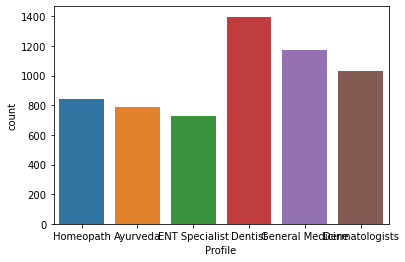

In [20]:
sns.countplot(x='Profile',data=dfc)
print(dfc['Profile'].value_counts())

In [21]:
print(dfc['Miscellaneous_Info'].value_counts())

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      2660
Tooth Extraction Dental Fillings Scaling / Polishing                                      12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                     12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment       9
Skin Allergy Treatment Skin Allergies Dermabrasion                                         9
                                                                                        ... 
97% 38 Feedback Vasant Kunj, Delhi                                                         1
100% 1 Feedback Khar West, Mumbai                                                          1
92% 7 Feedback Borivali West, Mumbai                                                       1
89% 33 Feedback Sarjapur Road, Bangalore                                                   1
Dental Braces Fixing Orthodontic Treatment Invisible/Clear Braces     

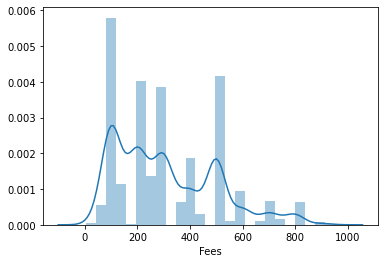

In [22]:
sns.distplot(dfc['Fees'],kde=True)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in dfc.columns:
    if dfc[i].dtype=="object":
        dfc[i]=enc.fit_transform(dfc[i].values.reshape(-1,1))

In [24]:
dfc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401.0,16.0,0.0,299.0,5.0,130.0,100
1,73.0,3.0,49.0,866.0,0.0,1422.0,350
2,1135.0,63.0,0.0,457.0,3.0,1595.0,300
3,464.0,3.0,0.0,68.0,0.0,1695.0,250
4,10.0,12.0,0.0,337.0,0.0,253.0,250


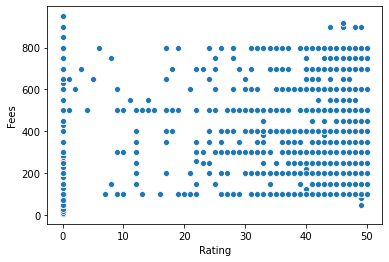

In [25]:
sns.scatterplot(x='Rating',y='Fees',data=dfc)

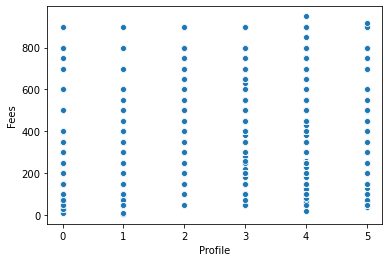

In [26]:
sns.scatterplot(x='Profile',y='Fees',data=dfc)

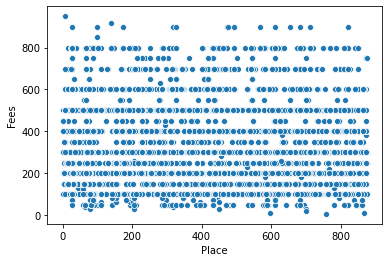

In [27]:
sns.scatterplot(x='Place',y='Fees',data=dfc)

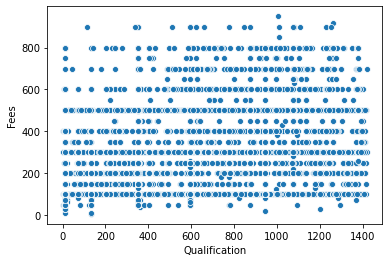

In [28]:
sns.scatterplot(x='Qualification',y='Fees',data=dfc)

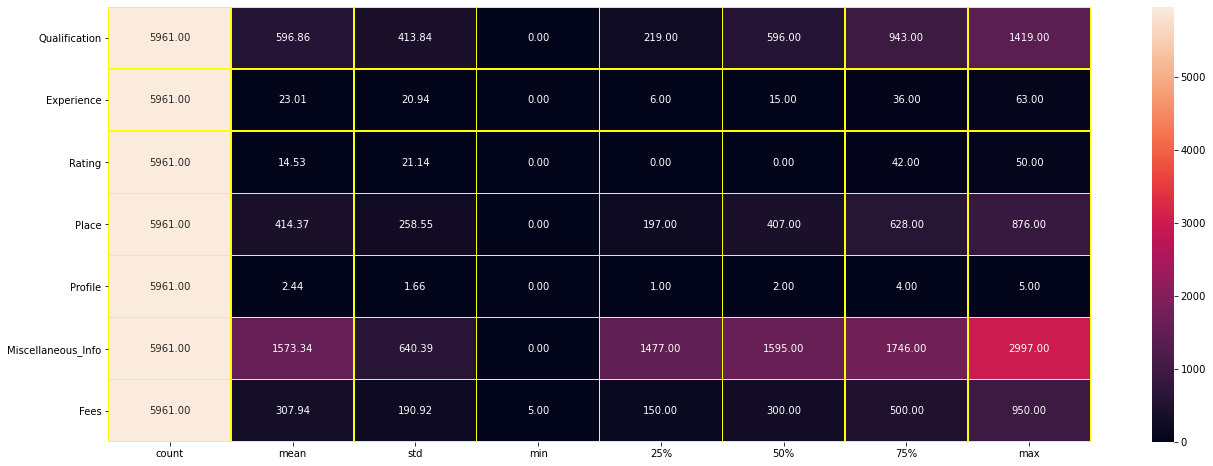

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(dfc.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

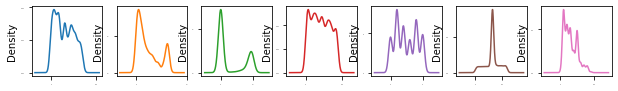

In [30]:
dfc.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

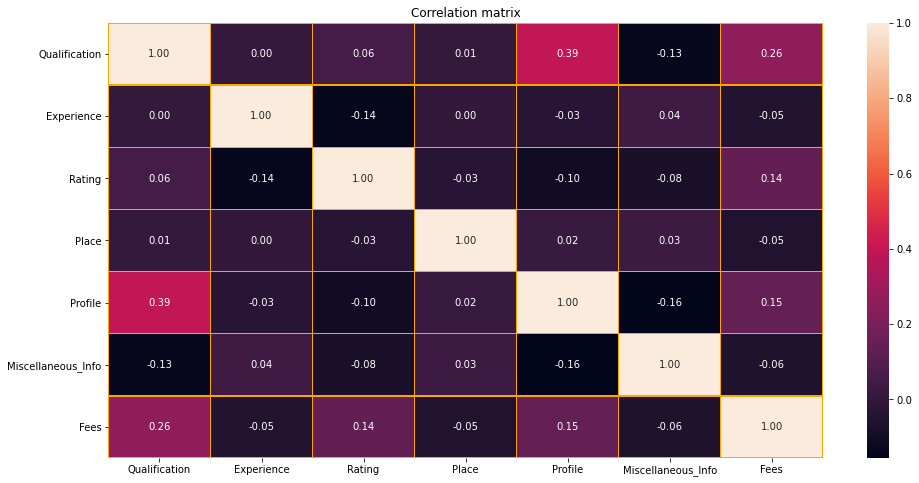

In [31]:
corr=dfc.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

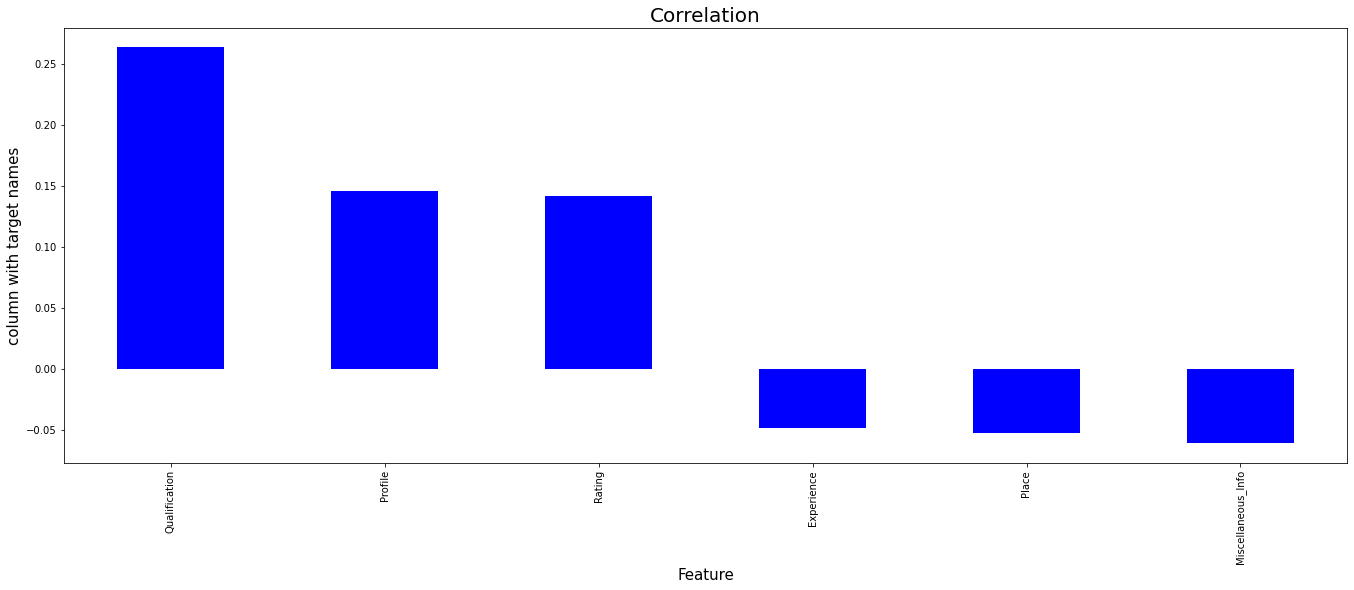

In [32]:
plt.figure(figsize=(23,8))
dfc.corr()['Fees'].sort_values(ascending=False).drop(['Fees']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

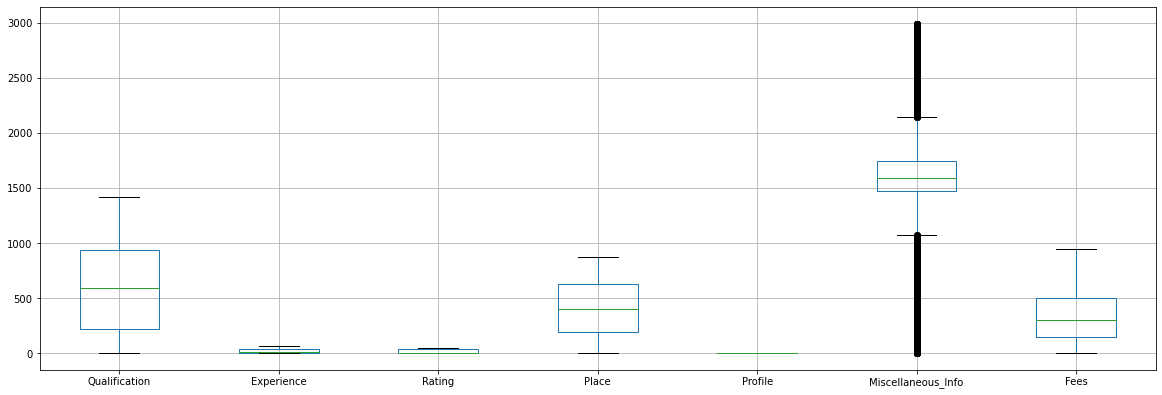

In [33]:
dfc.iloc[:,0:7].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [34]:
dfc.skew()

Qualification         0.239720
Experience            0.823531
Rating                0.817666
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218460
Fees                  0.751870
dtype: float64

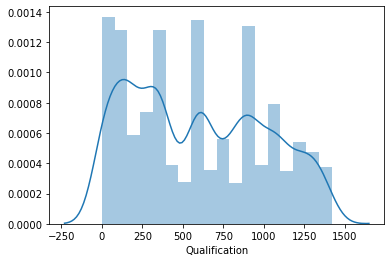

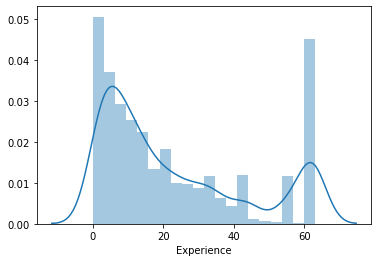

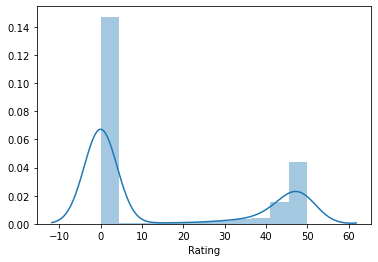

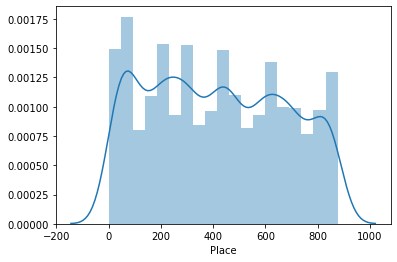

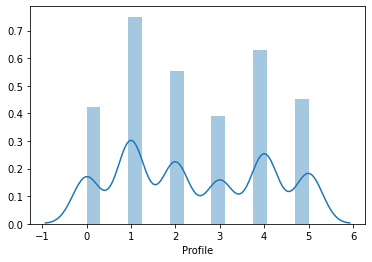

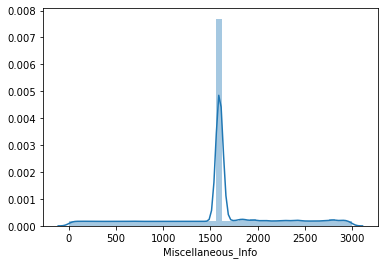

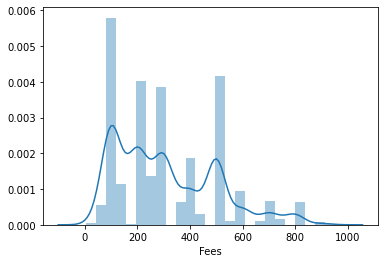

In [35]:
for j in dfc.columns:
    plt.figure()
    sns.distplot(dfc[j])

In [36]:
x=dfc.drop(['Fees'],axis=1)
y=dfc['Fees']

In [37]:
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,401.0,16.0,0.0,299.0,5.0,130.0
1,73.0,3.0,49.0,866.0,0.0,1422.0
2,1135.0,63.0,0.0,457.0,3.0,1595.0
3,464.0,3.0,0.0,68.0,0.0,1695.0
4,10.0,12.0,0.0,337.0,0.0,253.0


In [38]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [40]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)*100
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_state  1
Best Accuracy is  10.615574175285614 on Random_s

Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.409759651975426 on Random_state  25
Best Accuracy is  11.4097596519

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=267)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred)*100)

predicted price [313.93570581 304.13332744 378.2295783  ... 281.43943842 245.90147709
 290.30368262]
actual price 2926    400
1843    100
3415    300
5633    800
4556    100
       ... 
4241    500
3973    250
3133    150
2375    100
5239    200
Name: Fees, Length: 1789, dtype: int64
Error :-
mean absolute error :- 147.1055639594126
mean squared error :- 32780.39337845551
root mean squared error :- 181.05356494268625
r2_score value :- 11.720840742745665


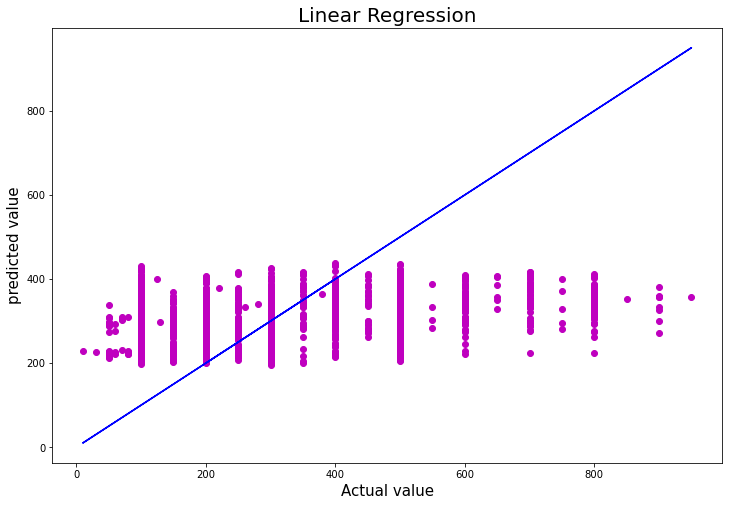

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [44]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
en=ElasticNet()
gsp=GridSearchCV(en,parameters)
gsp.fit(x_train,y_train)
print(gsp.best_params_)

{'alpha': 0.001, 'random_state': 1}


In [45]:
en=ElasticNet(alpha=0.001,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)

cv_score=cross_val_score(en,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.11705423700523399
0.08975476570567571


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)

cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.1579661898708995
0.16380919499072483


In [47]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)

cv_score=cross_val_score(ad,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.13498432110087166
0.0965126687149751


In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)

cv_score=cross_val_score(dtr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

-0.5228928609938126
-0.555947160271601


minimum difference is r2score and cross validation score is for RandomForestRegressor() so this is our best model.

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)
print(r2)

0.160856831685807


In [51]:
import joblib
joblib.dump(rf,'doctorconsultationmodel.pkl')

['doctorconsultationmodel.pkl']